In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=6,6

In [11]:
mean = np.array([0, 0])
cov = np.array([[1, -0.5], [-0.5, 1]])

distr = scipy.stats.multivariate_normal(mean, cov, 6133)

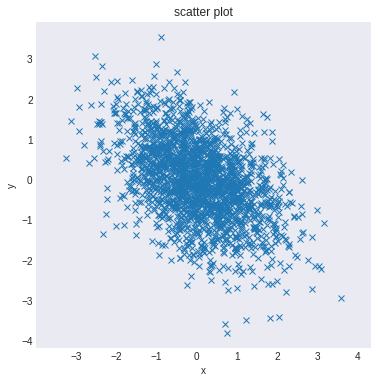

In [12]:
def scatter(distr):
    points = distr.rvs(size = 2000)
    x, y = points.T

    plt.title("scatter plot")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot(x, y, 'x')

    plt.axis('equal')

    plt.show()
scatter(distr)

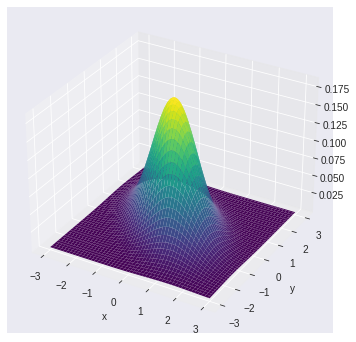

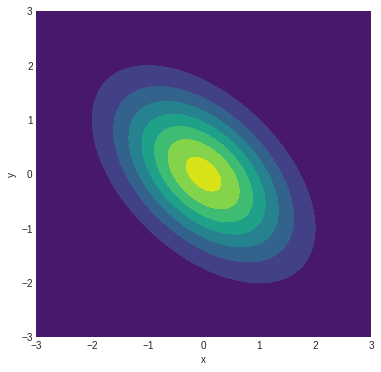

In [13]:
def pdf_hill(distr, num=100):
    variances = [np.sqrt(distr.cov[i, i]) for i in range(2)]
    x, y = [np.linspace(-3 * sigma, 3 * sigma, num) for sigma in variances]
    x, y = np.meshgrid(x, y)
    pos = np.dstack((x, y))
    pdf = distr.pdf(pos)

    fig = plt.figure()
    ax = plt.axes(projection='3d') 
    ax.plot_surface(x, y, pdf, cmap='viridis')
    plt.xlabel('x')
    plt.ylabel('y')
    
    plt.show()
    
    plt.contourf(x, y, pdf, cmap='viridis')
    plt.xlabel('x')
    plt.ylabel('y')
    
    plt.show()
    
pdf_hill(distr)

In [14]:
mean = np.array([0, 0, np.pi/4])
cov = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

distr3d = scipy.stats.multivariate_normal(mean, cov, 6133)

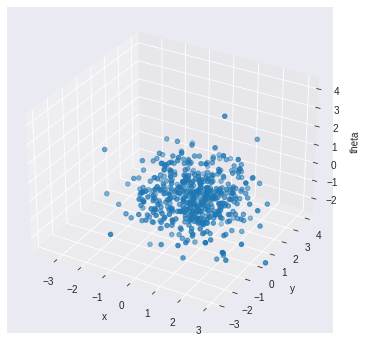

In [7]:
def scatter3d(distr, num=500):
    points = distr.rvs(size = num)
    x, y, th = points.T

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("theta")
    
    ax.scatter(x, y, th, 'x')

    plt.show()
scatter3d(distr3d)

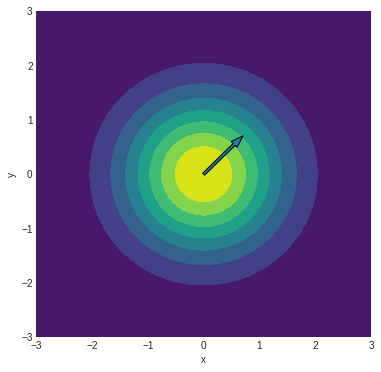

In [8]:
def pose_pdf(distr, num=100):
    distr2d = scipy.stats.multivariate_normal(distr.mean[0:2], [c[0:2] for c in distr.cov[0:2]], 6133)
    variances = [np.sqrt(distr.cov[i, i]) for i in range(3)]
    x, y, th = [np.linspace(-3 * sigma, 3 * sigma, num) for sigma in variances]
    x, y = np.meshgrid(x, y)
    pos = np.dstack((x, y))
    pdf = distr2d.pdf(pos)
    
    plt.contourf(x, y, pdf, cmap='viridis')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.arrow(distr.mean[0], distr.mean[1], np.cos(distr.mean[2])/variances[2], np.sin(distr.mean[2])/variances[2], width=0.05, length_includes_head=True)
    
    plt.show()
pose_pdf(distr3d)

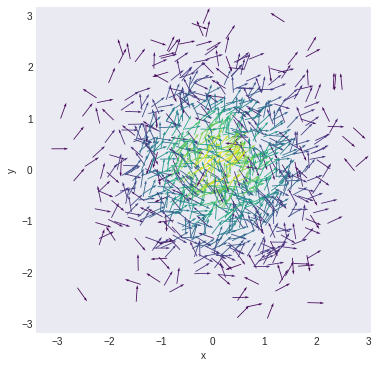

In [9]:
def pose_field(distr, num=1000):
#     variances = [np.sqrt(distr.cov[i, i]) for i in range(3)]
    points = distr.rvs(size = num)
    x, y, th = points.T
    u, v = [f(th) for f in [np.cos, np.sin]]
    pdf = [distr.pdf([mx, my, mth]) for mx, my, mth in zip(x, y, th)]
    
    
    plt.quiver(x, y, u, v, pdf, cmap='viridis', scale=20)
    plt.xlabel('x')
    plt.ylabel('y')
    
    plt.show()
pose_field(distr3d)